### Collagen violin plot

This file will generate the violin plots to compare end point statistics for multiple cases.

### Importing required files and libraries

In [1]:
import glob
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random, pickle
import os
import seaborn as sns

root_directory = os.getcwd()
path = root_directory + '\\' + '\Collagen_violin_data'
try:
    os.chdir(path)
except:
    print('Collagen_violin_data folder')

### Loading data

End point data for 11 cases with 15 replications are saved in [^1].

[^1]: https://github.com/ashleefv/covid19fibrosis/tree/master/Analysis/Collagen_violin_data

In [2]:
DM = np.array(pickle.load(open('DM.p', 'rb')))
D = np.array(pickle.load(open('D.p', 'rb')))
M = np.array(pickle.load(open('M.p', 'rb')))
DHMH = np.array(pickle.load(open('DHMH.p', 'rb')))
DLML = np.array(pickle.load(open('DLML.p', 'rb')))
DHML = np.array(pickle.load(open('DHML.p', 'rb')))
DLMH = np.array(pickle.load(open('DLMH.p', 'rb')))
DA = np.array(pickle.load(open('DA.p', 'rb')))
MA = np.array(pickle.load(open('MA.p', 'rb')))
DAU = np.array(pickle.load(open('DAU.p', 'rb')))
MAU = np.array(pickle.load(open('MAU.p', 'rb')))

### Generating output without fibroblasts TGF-β uptake cases

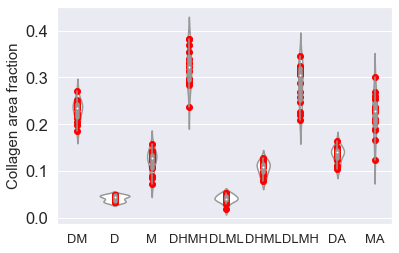

In [3]:
os.chdir(root_directory)
x_data = np.array(['DM','D', 'M', 'DHMH', 'DLML', 'DHML', 'DLMH', 'DA', 'MA'])
y_data = np.array([DM, D, M, DHMH, DLML, DHML, DLMH, DA, MA])

y_data = np.transpose(y_data)
y_mean = np.mean(y_data, axis=0)

sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.5)
ax = sns.violinplot(data=y_data, color="white")
ax.set_xticklabels(x_data,fontsize=13)
ax.set_ylabel("Collagen area fraction",fontsize=15)

for i in range(len(DM)):
    plt.scatter(x=range(len(y_mean)),y=y_data[:][i], c="red")
plt.savefig("Collagen_violin.png", dpi=300, bbox_inches='tight')
plt.show()

### Generating output to study the effect of fibroblasts TGF-β uptake (DAU and MAU)

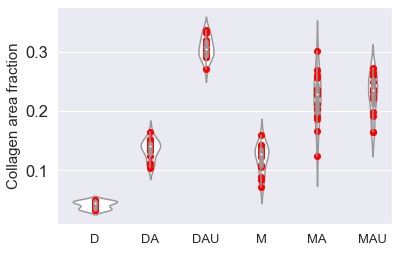

In [4]:
x_data = np.array(['D','DA', 'DAU', 'M', 'MA', 'MAU'])
y_data = np.array([D, DA, DAU, M, MA, MAU])

y_data = np.transpose(y_data)
y_mean = np.mean(y_data, axis=0)

sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.5)
ax = sns.violinplot(data=y_data, color="white")
ax.set_xticklabels(x_data,fontsize=13)
ax.set_ylabel("Collagen area fraction",fontsize=15)

for i in range(len(D)):
    plt.scatter(x=range(len(y_mean)),y=y_data[:][i], c="red")
plt.savefig("Collagen_violin_with_fibroblast_uptake.png", dpi=300, bbox_inches='tight')
plt.show()
